In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [7]:
# Conversiones de color que brinda opencv
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags[40])

COLOR_BGR2HLS


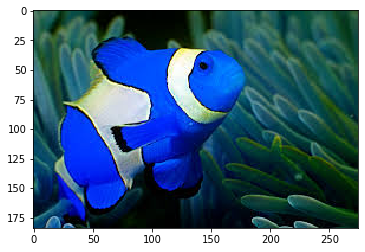

In [8]:
nemo = cv2.imread(r'/home/gdigiuseppe/Descargas/nemo0.jpg')
#print(nemo)
plt.imshow(nemo)
plt.show()

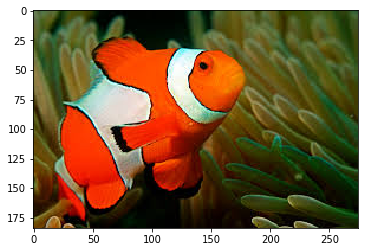

In [11]:
# cvtColor = Convert Color 
# Blue Green Red to Red Green Blue
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
# OpenCV por defecto viene con los canales de Azul y Rojo invertidos
# Para tener la imagen verdadera debemos invertirla de BGR a RGB 
plt.imshow(nemo)
plt.show()

In [18]:
# Para poder representar los colores tenemos que normalizarlos
# y pasarlos en una lista, no en un numpy array
# para ello hacemos el reshape de la imagen nemo
pixel_colors = nemo.reshape((np.shape(nemo)[0]*np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
# tambien obtenemos los colores de los pixeles que vamos a usar
pixel_colors = norm(pixel_colors).tolist()

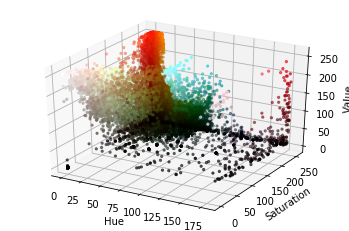

In [16]:
# Hay que entender, que si no hubiera transformado a RGB
# la conversion de color seria BGR2HSV y no RGB2HSV
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_nemo)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()